In [1]:
# import necessary libraries
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns
import math
import re
import time
import os
import sys
import csv
import string
import warnings
warnings.filterwarnings('ignore') 

import statsmodels.formula.api as sm

from sklearn import tree, svm, metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

pd.set_option("display.max_rows", 100, "display.max_columns", 100)

Here we will do actual analysis. Since we have already converted the dataframes to csv files, we won't have to run all the web-scraping algorithms.

In [2]:
all_nba_players = pd.read_csv('csv_files/all_nba_players.csv')

In [3]:
display(all_nba_players.head(500))
display(all_nba_players.dtypes)

,Player,Debut,Last Active,YOE,Retired,Position,Team,Total Games,Career PPG,Total PTS,Career RPG,Total RBS,Career APG,Total AST,Career SPG,Total STL,Career BPG,Total BLK,Career FG%,Career FG3%,Career FT%,Career eFG%,PER,Avg WS,Total WS,Hall of Fame,Year Inducted,All-Stars,Scoring Champs,Rebound Champs,Assist Champs,Steal Champs,Block Champs,NBA Champs,All-NBA,All-Rookie,ROY,All-Defensive,Most Improved,Sixth Man,AS MVPs,DPOYs,MVPs,Finals MVPs,NBA 75th Anniv. Team
0,Alaa Abdelnaby,1990,1995,5,1,PF,POR,256,5.7,1465,3.3,846,0.3,85,0.3,71,0.3,69,50.2,0.0,70.1,50.2,13.0,1.0,4.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Zaid Abdul-Aziz,1968,1978,10,1,C,HOU,505,9.0,4557,8.0,4065,1.2,601,0.6,131,1.0,205,42.8,0.0,72.8,50.2,15.1,1.8,17.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Kareem Abdul-Jabbar,1969,1989,20,1,C,LAL,1560,24.6,38387,11.2,17440,3.6,5660,0.9,1160,2.6,3189,55.9,5.6,72.1,55.9,24.6,13.7,273.4,1,1995,19,2,1,0,0,4,6,15,1,1,11,0,0,0,0,6,2,1
3,Mahmoud Abdul-Rauf,1990,2001,9,1,PG,DEN,586,14.6,8553,1.9,1087,3.5,2079,0.8,487,0.1,46,44.2,35.4,90.5,47.2,15.4,2.8,25.2,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,Tariq Abdul-Wahad,1997,2003,6,1,SG,DEN,236,7.8,1830,3.3,776,1.1,266,0.8,184,0.4,83,41.7,23.7,70.3,42.2,11.4,0.6,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Ernest Brown,2001,2002,1,1,C,MIA,3,1.0,3,2.0,6,0.0,0,0.0,0,0.3,1,16.7,0.0,25.0,16.7,-9.7,-0.2,-0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
496,Fred Brown,1971,1984,13,1,SG,OKC,963,14.6,14018,2.7,2637,3.3,3160,1.4,1149,0.2,166,47.8,37.3,85.8,48.2,17.7,4.9,63.2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
497,George Brown,1957,1958,1,1,NaN,LAL,1,1.0,1,1.0,1,0.0,0,1.4,1149,0.2,166,0.0,37.3,50.0,48.2,-7.2,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
498,Gerald Brown,1998,1999,1,1,SG,PHO,33,2.4,80,0.7,22,0.9,31,0.2,5,0.0,1,37.1,30.0,78.6,38.8,7.3,-0.3,-0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Player                   object
Debut                     int64
Last Active               int64
YOE                       int64
Retired                   int64
Position                 object
Team                     object
Total Games               int64
Career PPG              float64
Total PTS                 int64
Career RPG              float64
Total RBS                 int64
Career APG              float64
Total AST                 int64
Career SPG              float64
Total STL                 int64
Career BPG              float64
Total BLK                 int64
Career FG%              float64
Career FG3%             float64
Career FT%              float64
Career eFG%             float64
PER                     float64
Avg WS                  float64
Total WS                float64
Hall of Fame              int64
Year Inducted             int64
All-Stars                 int64
Scoring Champs            int64
Rebound Champs            int64
Assist Champs             int64
Steal Ch

In [4]:
display(all_nba_players.describe())

,Debut,Last Active,YOE,Retired,Total Games,Career PPG,Total PTS,Career RPG,Total RBS,Career APG,Total AST,Career SPG,Total STL,Career BPG,Total BLK,Career FG%,Career FG3%,Career FT%,Career eFG%,PER,Avg WS,Total WS,Hall of Fame,Year Inducted,All-Stars,Scoring Champs,Rebound Champs,Assist Champs,Steal Champs,Block Champs,NBA Champs,All-NBA,All-Rookie,ROY,All-Defensive,Most Improved,Sixth Man,AS MVPs,DPOYs,MVPs,Finals MVPs,NBA 75th Anniv. Team
count,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.00000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.00000,4397.000000,4397.000000,4397.000000
mean,1991.204003,1996.766432,5.268820,0.807824,290.551740,6.455788,2992.915624,2.942188,1291.967478,1.456902,667.068228,0.54312,229.152377,0.314146,140.807141,41.443484,21.496634,67.131385,45.513282,11.044485,1.508710,14.771139,0.035934,63.221060,0.411417,0.017057,0.016375,0.016602,0.010917,0.010917,0.209234,0.203775,0.112349,0.019331,0.126450,0.008187,0.008870,0.017967,0.00887,0.016830,0.012054,0.017285
std,20.994117,21.249146,4.500436,0.394056,320.393188,4.823565,4725.649713,2.276650,2129.285266,1.392988,1213.283236,0.39358,349.238838,0.373521,304.744467,10.820365,16.666644,20.159278,11.391855,6.664832,2.081922,27.272577,0.186146,349.962118,1.663636,0.254049,0.269305,0.270555,0.157809,0.168947,0.717566,1.171334,0.315832,0.137702,0.834822,0.090123,0.113524,0.180725,0.14040,0.217916,0.169542,0.130344
min,1946.000000,1950.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-48.600000,-2.000000,-10.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1976.000000,1982.000000,1.000000,1.000000,34.000000,2.900000,97.000000,1.300000,42.000000,0.500000,19.000000,0.30000,9.000000,0.100000,3.000000,37.600000,0.000000,62.300000,42.300000,8.700000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1993.000000,2000.000000,3.000000,1.000000,143.000000,5.200000,761.000000,2.400000,351.000000,1.000000,152.000000,0.50000,71.000000,0.200000,29.000000,42.700000,25.000000,71.800000,46.900000,11.600000,0.700000,2.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2010.000000,2016.000000,8.000000,1.000000,490.000000,8.700000,3948.000000,3.900000,1713.000000,2.000000,752.000000,0.80000,316.000000,0.400000,141.000000,46.900000,33.800000,78.400000,50.500000,14.200000,2.400000,17.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,2021.000000,2022.000000,22.000000,1.000000,1611.000000,30.100000,38387.000000,22.900000,23924.000000,11.200000,15806.000000,2.70000,3265.000000,3.500000,3830.000000,100.000000,100.000000,100.000000,150.000000,88.300000,17.900000,273.400000,1.000000,2022.000000,19.000000,10.000000,11.000000,9.000000,6.000000,4.000000,11.000000,17.000000,1.000000,1.000000,15.000000,1.000000,3.000000,4.000000,4.00000,6.000000,6.000000,1.000000


In [5]:
retired_csv = pd.read_csv('csv_files/retired_players.csv')

,Debut,Last Active,YOE,Total Games,Career PPG,Total PTS,Career RPG,Total RBS,Career APG,Total AST,Career SPG,Total STL,Career BPG,Total BLK,Career FG%,Career FG3%,Career FT%,Career eFG%,PER,Avg WS,Total WS,Hall of Fame,Year Inducted,All-Stars,Scoring Champs,Rebound Champs,Assist Champs,Steal Champs,Block Champs,NBA Champs,All-NBA,All-Rookie,ROY,All-Defensive,Most Improved,Sixth Man,AS MVPs,DPOYs,MVPs,Finals MVPs,NBA 75th Anniv. Team
Debut,1.000000,0.969948,0.020467,-0.047841,-0.181047,-0.087623,-0.183020,-0.099705,-0.164011,-0.074202,-0.143760,-0.074973,-0.036615,-0.030858,0.142219,0.045260,-0.064751,-0.037921,0.046124,-0.157595,-0.077049,-0.177165,-0.148261,-0.134297,-0.045533,-0.041751,-0.040676,-0.001409,0.000707,-0.106573,-0.084213,0.043462,-0.071161,-0.023231,0.040869,0.026851,-0.062821,0.012661,-0.044410,-0.012603,-0.078013
Last Active,0.969948,1.000000,0.259240,0.184669,-0.003343,0.113002,-0.033851,0.088524,-0.030403,0.099511,-0.022277,0.089969,0.056465,0.095497,0.225618,0.094989,0.019789,0.023010,0.150598,0.024935,0.112914,-0.093321,-0.065119,-0.024419,-0.014241,-0.012255,-0.008657,0.026819,0.030419,-0.017529,-0.000394,0.139174,-0.019284,0.046229,0.068533,0.064241,-0.013125,0.042268,-0.001732,0.028031,-0.008364
YOE,0.020467,0.259240,1.000000,0.974195,0.720611,0.837418,0.600922,0.783698,0.534674,0.723863,0.491407,0.688747,0.385153,0.531262,0.364504,0.209012,0.333980,0.248090,0.442557,0.749990,0.795315,0.327360,0.328290,0.443845,0.117326,0.120952,0.117926,0.110748,0.126359,0.354457,0.338038,0.413744,0.206566,0.293072,0.120128,0.162557,0.193339,0.125746,0.166519,0.159932,0.279354
Total Games,-0.047841,0.184669,0.974195,1.000000,0.767218,0.888630,0.632591,0.827117,0.577784,0.772263,0.528343,0.727793,0.385131,0.546718,0.352325,0.206045,0.334794,0.241496,0.445851,0.808967,0.845383,0.366168,0.366811,0.490534,0.129074,0.132638,0.134102,0.124677,0.126023,0.370750,0.365881,0.440002,0.227184,0.324023,0.109578,0.165357,0.214157,0.129666,0.188204,0.174730,0.312330
Career PPG,-0.181047,-0.003343,0.720611,0.767218,1.000000,0.881102,0.674742,0.706910,0.661922,0.698305,0.593297,0.613506,0.304488,0.388382,0.346492,0.234800,0.400027,0.248806,0.519892,0.862596,0.792160,0.486797,0.499286,0.624429,0.263541,0.151282,0.121278,0.149714,0.070192,0.285560,0.493368,0.527412,0.351675,0.266376,0.120366,0.120774,0.339625,0.077728,0.261666,0.238319,0.407041
Total PTS,-0.087623,0.113002,0.837418,0.888630,0.881102,1.000000,0.625197,0.838383,0.604666,0.806473,0.539167,0.723949,0.344640,0.519340,0.284902,0.189068,0.287157,0.194012,0.450470,0.880556,0.944846,0.539054,0.557746,0.738479,0.286173,0.199455,0.163528,0.171909,0.121507,0.364222,0.597072,0.528941,0.360258,0.386104,0.115561,0.167466,0.397900,0.120489,0.346839,0.314634,0.512947
Career RPG,-0.183020,-0.033851,0.600922,0.632591,0.674742,0.625197,1.000000,0.841403,0.262940,0.372511,0.317677,0.372448,0.530402,0.511542,0.328530,0.015108,0.176902,0.201995,0.440801,0.722831,0.649437,0.408666,0.410581,0.487713,0.182262,0.299003,0.049042,0.050723,0.150239,0.274486,0.378788,0.372168,0.315459,0.262350,0.062084,0.060592,0.235550,0.144765,0.285859,0.165699,0.336646
Total RBS,-0.099705,0.088524,0.783698,0.827117,0.706910,0.838383,0.841403,1.000000,0.370656,0.575684,0.377718,0.559052,0.513940,0.656623,0.299528,0.078613,0.191836,0.180053,0.408409,0.811037,0.869097,0.485847,0.495900,0.646499,0.217310,0.360809,0.096302,0.085294,0.205363,0.364441,0.511733,0.444359,0.350234,0.406232,0.077481,0.105446,0.308997,0.203960,0.387710,0.250646,0.460487
Career APG,-0.164011,-0.030403,0.534674,0.577784,0.661922,0.604666,0.262940,0.370656,1.000000,0.853884,0.656672,0.605843,0.009893,0.130300,0.149137,0.273128,0.336493,0.141527,0.323598,0.599880,0.561138,0.342986,0.349968,0.423134,0.121900,0.062265,0.306623,0.232719,0.009764,0.221899,0.359273,0.336820,0.215111,0.235657,0.096089,0.074430,0.249965,0.037683,0.172553,0.172138,0.298033
Total AST,-0.074202,0.099511,0.723863,0.772263,0.698305,0.806473,0.372511,0.575684,0.853884,1.000000

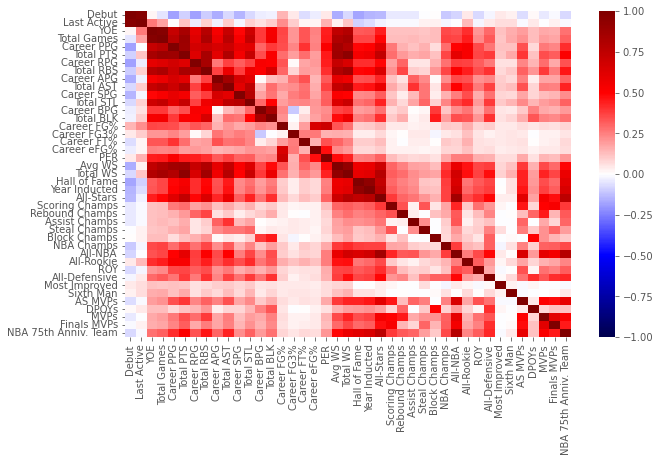

In [6]:
#correlation matrix #we'll also drop the retired column since it's not particularly useful
corr = retired_csv.drop(columns=['Retired']).corr()
display(corr)

# heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap='seismic');
plt.show()

In [7]:
# pd.plotting.scatter_matrix(corr, c='b', alpha=0.6, figsize=(15, 10), diagonal='hist');
# plt.show()

In [8]:
#correlation matrix
hof_corr = retired_csv.drop(columns=['Retired','Year Inducted']).corr()['Hall of Fame']
display(hof_corr)

Debut                  -0.177165
Last Active            -0.093321
YOE                     0.327360
Total Games             0.366168
Career PPG              0.486797
Total PTS               0.539054
Career RPG              0.408666
Total RBS               0.485847
Career APG              0.342986
Total AST               0.445868
Career SPG              0.228390
Total STL               0.278067
Career BPG              0.193951
Total BLK               0.257230
Career FG%              0.095766
Career FG3%             0.032494
Career FT%              0.099830
Career eFG%             0.076339
PER                     0.245824
Avg WS                  0.564312
Total WS                0.588365
Hall of Fame            1.000000
All-Stars               0.740993
Scoring Champs          0.295284
Rebound Champs          0.244303
Assist Champs           0.217959
Steal Champs            0.115367
Block Champs            0.109246
NBA Champs              0.379369
All-NBA                 0.640748
All-Rookie

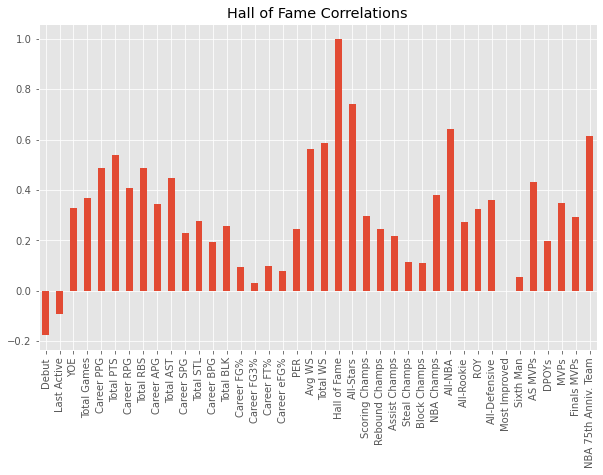

In [9]:
hof_corr.plot.bar()
plt.title('Hall of Fame Correlations')
plt.show()

In [10]:
# we'll also delete Hall of Fame since it directly correlates to itself
remove_key = ['Hall of Fame']

hof_corr_dict = hof_corr.to_dict()
[hof_corr_dict.pop(var) for var in remove_key]

print(hof_corr_dict)

{'Debut': -0.1771647804315838, 'Last Active': -0.09332134543654481, 'YOE': 0.3273602919073686, 'Total Games': 0.3661682798962694, 'Career PPG': 0.48679725814199776, 'Total PTS': 0.5390536577006722, 'Career RPG': 0.40866631854906466, 'Total RBS': 0.4858471980046855, 'Career APG': 0.3429858132549136, 'Total AST': 0.445867936242359, 'Career SPG': 0.22839039951805326, 'Total STL': 0.27806690067942647, 'Career BPG': 0.19395094434259047, 'Total BLK': 0.25722986571105116, 'Career FG%': 0.09576648186087196, 'Career FG3%': 0.03249379457197546, 'Career FT%': 0.09983043846678175, 'Career eFG%': 0.07633873576774018, 'PER': 0.24582378452303327, 'Avg WS': 0.5643123731488527, 'Total WS': 0.5883647474269982, 'All-Stars': 0.7409930663828911, 'Scoring Champs': 0.2952838762601664, 'Rebound Champs': 0.24430260705877385, 'Assist Champs': 0.21795901401442042, 'Steal Champs': 0.11536743754484192, 'Block Champs': 0.10924630522910003, 'NBA Champs': 0.37936923252371896, 'All-NBA': 0.6407479856837613, 'All-Rooki

Lets choose all variables that have a moderate positive correlation; which is anything above 0.30 (nearest 2 decimal points):

In [11]:
predictive_variables = [key for key, value in hof_corr_dict.items() if round(value, 2) >= 0.35]

In [12]:
print(predictive_variables, len(predictive_variables))

['Career PPG', 'Total PTS', 'Career RPG', 'Total RBS', 'Total AST', 'Avg WS', 'Total WS', 'All-Stars', 'All-NBA', 'AS MVPs', 'NBA 75th Anniv. Team'] 11


In [13]:
hof_players = pd.read_csv('csv_files/hall_of_famers.csv')

In [14]:
hof_players.describe()

,Debut,Last Active,YOE,Retired,Total Games,Career PPG,Total PTS,Career RPG,Total RBS,Career APG,Total AST,Career SPG,Total STL,Career BPG,Total BLK,Career FG%,Career FG3%,Career FT%,Career eFG%,PER,Avg WS,Total WS,Hall of Fame,Year Inducted,All-Stars,Scoring Champs,Rebound Champs,Assist Champs,Steal Champs,Block Champs,NBA Champs,All-NBA,All-Rookie,ROY,All-Defensive,Most Improved,Sixth Man,AS MVPs,DPOYs,MVPs,Finals MVPs,NBA 75th Anniv. Team
count,129.000000,129.000000,129.000000,129.0,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.0,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,1970.984496,1984.689922,13.372093,1.0,934.643411,18.292248,17304.496124,7.743411,7115.271318,3.867442,3688.627907,1.010078,803.186047,0.700775,606.217054,46.586822,22.325581,76.672868,49.134884,19.310078,7.710078,105.236434,1.0,1984.031008,7.565891,0.465116,0.403101,0.372093,0.100775,0.116279,1.651163,4.527132,0.542636,0.279070,1.868217,0.007752,0.038760,0.472868,0.155039,0.465116,0.294574,0.488372
std,15.374484,17.513744,3.288402,0.0,262.456181,4.571731,7050.812409,4.009712,4400.377883,2.002895,2423.815084,0.579580,727.126276,0.734262,847.158227,4.983071,13.964007,7.702321,8.514754,3.214781,2.595725,48.341775,0.0,176.779212,3.663257,1.311288,1.383606,1.381065,0.465110,0.553792,2.152946,3.958925,0.500121,0.450291,3.371248,0.088045,0.230594,0.829886,0.618082,1.090058,0.813971,0.501814
min,1946.000000,1954.000000,3.000000,1.0,202.000000,5.700000,3315.000000,1.900000,980.000000,1.000000,587.000000,0.000000,0.000000,0.000000,0.000000,30.200000,0.000000,41.400000,0.000000,10.900000,2.200000,16.100000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1958.000000,1972.000000,11.000000,1.0,767.000000,15.600000,12183.000000,4.400000,3926.000000,2.500000,2079.000000,0.600000,123.000000,0.200000,39.000000,43.800000,13.800000,73.600000,46.400000,17.300000,6.000000,75.000000,1.0,1987.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,1983.000000,13.000000,1.0,914.000000,18.500000,17009.000000,6.700000,5739.000000,3.500000,3050.000000,1.000000,648.000000,0.400000,262.000000,46.600000,25.300000,78.000000,49.500000,19.000000,7.200000,93.500000,1.0,2000.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1984.000000,1999.000000,15.000000,1.0,1074.000000,20.800000,21791.000000,10.300000,9383.000000,4.700000,4612.000000,1.300000,1219.000000,0.900000,807.000000,50.400000,32.500000,81.000000,51.800000,21.400000,8.900000,130.000000,1.0,2014.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,2003.000000,2018.000000,21.000000,1.0,1611.000000,30.100000,38387.000000,22.900000,23924.000000,11.200000,15806.000000,2.600000,3265.000000,3.100000,3830.000000,58.200000,66.700000,90.400000,100.000000,27.900000,17.700000,273.400000,1.0,2022.000000,19.000000,10.000000,11.000000,9.000000,3.000000,4.000000,11.000000,15.000000,1.000000,1.000000,15.000000,1.000000,2.000000,4.000000,4.000000,6.000000,6.000000,1.000000


In [15]:
active_csv = pd.read_csv('csv_files/active_players.csv')

In [16]:
active_csv.describe()

,Debut,Last Active,YOE,Retired,Total Games,Career PPG,Total PTS,Career RPG,Total RBS,Career APG,Total AST,Career SPG,Total STL,Career BPG,Total BLK,Career FG%,Career FG3%,Career FT%,Career eFG%,PER,Avg WS,Total WS,Hall of Fame,Year Inducted,All-Stars,Scoring Champs,Rebound Champs,Assist Champs,Steal Champs,Block Champs,NBA Champs,All-NBA,All-Rookie,ROY,All-Defensive,Most Improved,Sixth Man,AS MVPs,DPOYs,MVPs,Finals MVPs,NBA 75th Anniv. Team
count,845.000000,845.000000,845.000000,845.0,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.0,845.0,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000
mean,2016.569231,2021.421302,4.689941,0.0,244.485207,7.462485,2720.023669,3.187574,1101.137278,1.622604,590.231953,0.574320,196.327811,0.360000,124.328994,42.994675,28.928402,69.437988,48.797515,12.139290,1.735385,13.517988,0.0,0.0,0.336095,0.015385,0.016568,0.014201,0.016568,0.014201,0.113609,0.190533,0.160947,0.018935,0.121893,0.013018,0.008284,0.015385,0.014201,0.015385,0.011834,0.013018
std,3.994843,1.023432,3.899928,0.0,271.441656,5.286843,4203.481388,2.157633,1686.782157,1.531455,1107.111642,0.375608,297.091805,0.368885,231.949186,12.094045,13.135805,21.895370,12.774450,6.767935,2.081819,24.280895,0.0,0.0,1.456538,0.203057,0.237902,0.206039,0.227723,0.174939,0.434165,1.099507,0.367699,0.136376,0.702437,0.113417,0.123831,0.164360,0.174939,0.184725,0.175116,0.113417
min,2001.000000,2018.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-38.100000,-1.600000,-1.700000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,2021.000000,2.000000,0.0,33.000000,3.600000,110.000000,1.700000,59.000000,0.600000,21.000000,0.300000,10.000000,0.100000,6.000000,39.700000,25.600000,65.900000,46.600000,9.600000,0.100000,0.200000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,2022.000000,3.000000,0.0,136.000000,6.300000,932.000000,2.800000,414.000000,1.100000,178.000000,0.500000,73.000000,0.300000,35.000000,43.600000,32.900000,75.000000,50.700000,12.400000,1.100000,3.400000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2020.000000,2022.000000,7.000000,0.0,377.000000,10.200000,3605.000000,4.300000,1398.000000,2.100000,638.000000,0.800000,270.000000,0.500000,141.000000,47.800000,36.200000,81.300000,54.100000,15.300000,2.700000,16.700000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2021.000000,2022.000000,19.000000,0.0,1366.000000,27.200000,37062.000000,13.300000,14627.000000,9.500000,10977.000000,2.100000,2453.000000,2.300000,2228.000000,100.000000,100.000000,100.000000,150.000000,76.400000,13.100000,249.600000,0.0,0.0,18.000000,4.000000,5.000000,4.000000,6.000000,3.000000,4.000000,17.000000,1.000000,1.000000,9.000000,1.000000,3.000000,3.000000,3.000000,4.000000,4.000000,1.000000


In [17]:
retired_non_hof_csv = pd.read_csv('csv_files/retired_non_hof.csv')

In [18]:
retired_non_hof_csv.describe()

,Debut,Last Active,YOE,Retired,Total Games,Career PPG,Total PTS,Career RPG,Total RBS,Career APG,Total AST,Career SPG,Total STL,Career BPG,Total BLK,Career FG%,Career FG3%,Career FT%,Career eFG%,PER,Avg WS,Total WS,Hall of Fame,Year Inducted,All-Stars,Scoring Champs,Rebound Champs,Assist Champs,Steal Champs,Block Champs,NBA Champs,All-NBA,All-Rookie,ROY,All-Defensive,Most Improved,Sixth Man,AS MVPs,DPOYs,MVPs,Finals MVPs,NBA 75th Anniv. Team
count,3394.000000,3394.000000,3394.000000,3394.0,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.0,3394.0,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000
mean,1985.887154,1991.293459,5.080141,1.0,275.437831,5.725280,2495.005598,2.680996,1104.744549,1.317207,566.397761,0.516117,215.357690,0.287596,126.995580,40.858309,19.609988,66.158662,44.552563,10.433265,1.201738,11.523895,0.0,0.0,0.156158,0.000589,0.001768,0.003830,0.006187,0.006187,0.169122,0.042722,0.083088,0.009723,0.060401,0.007071,0.007661,0.001473,0.002062,0.000295,0.001473,0.000589
std,18.599109,19.467761,4.388790,0.0,307.283903,4.010657,3801.179593,1.975998,1742.602330,1.232712,1006.560805,0.376924,320.136175,0.343509,265.547724,10.589917,17.039870,19.969247,10.969976,6.505967,1.630761,20.004074,0.0,0.0,0.721698,0.024271,0.042015,0.085752,0.104243,0.131721,0.554946,0.379556,0.276056,0.098139,0.470346,0.083806,0.102720,0.038360,0.051461,0.017165,0.038360,0.024271
min,1946.000000,1950.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-48.600000,-2.000000,-10.700000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1973.000000,1978.000000,1.000000,1.0,32.000000,2.700000,83.000000,1.300000,36.000000,0.500000,16.000000,0.300000,8.000000,0.100000,3.000000,36.900000,0.000000,60.900000,41.500000,8.300000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1988.000000,1994.000000,3.000000,1.0,134.000000,4.750000,606.500000,2.200000,270.500000,0.900000,120.000000,0.400000,63.000000,0.200000,26.000000,42.300000,21.750000,70.650000,46.150000,11.200000,0.500000,1.600000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2001.000000,2007.000000,8.000000,1.0,471.750000,7.900000,3403.250000,3.600000,1512.750000,1.800000,631.750000,0.700000,305.000000,0.400000,132.000000,46.400000,32.900000,77.500000,49.500000,13.600000,2.000000,14.900000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2018.000000,2021.000000,22.000000,1.0,1541.000000,22.500000,31560.000000,11.900000,13017.000000,9.100000,10334.000000,2.700000,2453.000000,3.500000,3178.000000,100.000000,100.000000,100.000000,150.000000,88.300000,17.900000,206.300000,0.0,0.0,14.000000,1.000000,1.000000,4.000000,3.000000,4.000000,7.000000,12.000000,1.000000,1.000000,8.000000,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000


Lets go ahead and do some predictions:

In [19]:
X = retired_csv[predictive_variables]
y = retired_csv['Hall of Fame']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

# Probabliity Classification

In [20]:
logistic_reg = LogisticRegression().fit(X_train, y_train)

print(metrics.classification_report(y_test, logistic_reg.predict(X_test))); print()
print('Accuracy:', metrics.accuracy_score(y_test, logistic_reg.predict(X_test)))
print('Mean Abs Error: ', metrics.mean_absolute_error(y_test, logistic_reg.predict(X_test)))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, logistic_reg.predict(X_test))); print()
print(metrics.confusion_matrix(y_test, logistic_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       845
           1       0.87      0.77      0.81        43

    accuracy                           0.98       888
   macro avg       0.93      0.88      0.90       888
weighted avg       0.98      0.98      0.98       888


Accuracy: 0.9831081081081081
Mean Abs Error:  0.016891891891891893
Mean Squared Error:  0.016891891891891893

[[840   5]
 [ 10  33]]


In [21]:
# use platt scaling to calibrate and transform into probablity model
svm_model = svm.SVC(kernel='linear', probability=True).fit(X_train, y_train)

print(metrics.classification_report(y_test, svm_model.predict(X_test))); print()
print('Accuracy:', metrics.accuracy_score(y_test, svm_model.predict(X_test)))
print('Mean Abs Error: ', metrics.mean_absolute_error(y_test, svm_model.predict(X_test)))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, svm_model.predict(X_test))); print()
print(metrics.confusion_matrix(y_test, svm_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       845
           1       0.86      0.72      0.78        43

    accuracy                           0.98       888
   macro avg       0.92      0.86      0.89       888
weighted avg       0.98      0.98      0.98       888


Accuracy: 0.9808558558558559
Mean Abs Error:  0.019144144144144143
Mean Squared Error:  0.019144144144144143

[[840   5]
 [ 12  31]]


In [22]:
# print(cross_validate(svm_model, X, y, return_train_score=True))

In [23]:
bayes = GaussianNB().fit(X_train, y_train)

print(metrics.classification_report(y_test, bayes.predict(X_test))); print()
print('Accuracy: ', metrics.accuracy_score(y_test, bayes.predict(X_test)))
print('Mean Abs Error: ', metrics.mean_absolute_error(y_test, bayes.predict(X_test)))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, bayes.predict(X_test))); print()
print(metrics.confusion_matrix(y_test, bayes.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       845
           1       0.48      0.79      0.60        43

    accuracy                           0.95       888
   macro avg       0.73      0.87      0.78       888
weighted avg       0.96      0.95      0.95       888


Accuracy:  0.9481981981981982
Mean Abs Error:  0.0518018018018018
Mean Squared Error:  0.0518018018018018

[[808  37]
 [  9  34]]


# Binary Classification

In [24]:
svm_binary = svm.SVC().fit(X_train, y_train)

print(classification_report(y_test, svm_binary.predict(X_test))); print()
print('Accuracy: ', accuracy_score(y_test, svm_binary.predict(X_test)))
print('Mean Abs Error: ', metrics.mean_absolute_error(y_test, svm_binary.predict(X_test)))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, svm_binary.predict(X_test))); print()
print(confusion_matrix(y_test, svm_binary.predict(X_test))) 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       845
           1       0.73      0.19      0.30        43

    accuracy                           0.96       888
   macro avg       0.84      0.59      0.64       888
weighted avg       0.95      0.96      0.94       888


Accuracy:  0.9572072072072072
Mean Abs Error:  0.04279279279279279
Mean Squared Error:  0.04279279279279279

[[842   3]
 [ 35   8]]


In [25]:
decision_tree = tree.DecisionTreeClassifier().fit(X_train, y_train)

print(classification_report(y_test, decision_tree.predict(X_test))); print()
print('Accuracy: ', accuracy_score(y_test, decision_tree.predict(X_test)))
print('Mean Abs Error: ', metrics.mean_absolute_error(y_test, decision_tree.predict(X_test)))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, decision_tree.predict(X_test))); print()
print(confusion_matrix(y_test, decision_tree.predict(X_test))) 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       845
           1       0.78      0.65      0.71        43

    accuracy                           0.97       888
   macro avg       0.88      0.82      0.85       888
weighted avg       0.97      0.97      0.97       888


Accuracy:  0.9740990990990991
Mean Abs Error:  0.0259009009009009
Mean Squared Error:  0.0259009009009009

[[837   8]
 [ 15  28]]


In [26]:
rand_forest = RandomForestClassifier(n_estimators=1000).fit(X_train, y_train)

print(classification_report(y_test, rand_forest.predict(X_test))); print()
print('Accuracy: ', accuracy_score(y_test, rand_forest.predict(X_test)))
print('Mean Abs Error: ', metrics.mean_absolute_error(y_test, rand_forest.predict(X_test)))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, rand_forest.predict(X_test))); print()
print(confusion_matrix(y_test, rand_forest.predict(X_test))) 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       845
           1       0.88      0.70      0.78        43

    accuracy                           0.98       888
   macro avg       0.93      0.85      0.88       888
weighted avg       0.98      0.98      0.98       888


Accuracy:  0.9808558558558559
Mean Abs Error:  0.019144144144144143
Mean Squared Error:  0.019144144144144143

[[841   4]
 [ 13  30]]


In [27]:
# print(cross_validate(rand_forest, X, y, return_train_score=True))

In [28]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

print(classification_report(y_test, knn.predict(X_test))); print()
print('Accuracy: ', accuracy_score(y_test, knn.predict(X_test)))
print('Mean Abs Error: ', metrics.mean_absolute_error(y_test, knn.predict(X_test)))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, knn.predict(X_test))); print()
print(confusion_matrix(y_test, knn.predict(X_test))) 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       845
           1       0.73      0.26      0.38        43

    accuracy                           0.96       888
   macro avg       0.85      0.63      0.68       888
weighted avg       0.95      0.96      0.95       888


Accuracy:  0.9594594594594594
Mean Abs Error:  0.04054054054054054
Mean Squared Error:  0.04054054054054054

[[841   4]
 [ 32  11]]


In [29]:
nba_players_hof_prob = all_nba_players

In [30]:
def set_prob(row):
    player = row[predictive_variables]
    hof_probability = logistic_reg.predict_proba([player]);
    return hof_probability[0][1]

In [31]:
def hof_binary(row):
    player = row[predictive_variables]
    hof_binary = rand_forest.predict([player]);
    return hof_binary[0]

In [32]:
nba_players_hof_prob['HOF Probability'] = nba_players_hof_prob.apply(lambda row: set_prob(row), axis=1)

In [33]:
nba_players_hof_prob['HOF (Y/N)'] = nba_players_hof_prob.apply(lambda row: hof_binary(row), axis=1)

In [34]:
nba_players_hof_prob_to_csv = nba_players_hof_prob[['Player','Debut','Last Active','YOE','Position',
                                   'Team','Hall of Fame','HOF Probability','HOF (Y/N)']]

In [35]:
display(nba_players_hof_prob_to_csv)

,Player,Debut,Last Active,YOE,Position,Team,Hall of Fame,HOF Probability,HOF (Y/N)
0,Alaa Abdelnaby,1990,1995,5,PF,POR,0,0.007203,0
1,Zaid Abdul-Aziz,1968,1978,10,C,HOU,0,0.001154,0
2,Kareem Abdul-Jabbar,1969,1989,20,C,LAL,1,1.000000,1
3,Mahmoud Abdul-Rauf,1990,2001,9,PG,DEN,0,0.000476,0
4,Tariq Abdul-Wahad,1997,2003,6,SG,DEN,0,0.001488,0
...,...,...,...,...,...,...,...,...,...
4392,Paul Zipser,2016,2018,2,SF,CHI,0,0.004615,0
4393,Ante Žižić,2017,2020,3,C,CLE,0,0.004582,0
4394,Jim Zoet,1982,1983,1,C,DET,0,0.070174,0
4395,Bill Zopf,1970,1971,1,PG,MIL,0,0.025931,0


In [36]:
nba_players_hof_prob_to_csv.to_csv('csv_files/nba_players_hof_prob.csv', index=False)

In [37]:
hof_players.to_csv('csv_files/hof_players_prob.csv', index=False)

In [38]:
nba_players_hof_prob = nba_players_hof_prob.dropna()

In [39]:
nba_players_hof_prob.to_csv('csv_files/nba_players_hof_prob_with_stats.csv', index=False)

In [40]:
nba_players_hof_prob = pd.read_csv('csv_files/nba_players_hof_prob_with_stats.csv')

In [41]:
last_active = 2018; year_inducted = last_active+4

# predict 2022 hall of fame inductees
hof_prob = nba_players_hof_prob.sort_values(by='HOF Probability', ascending=False)

# get all retired players
retired_non_hof = hof_prob[(hof_prob['Last Active'] <= last_active) &
                                    (hof_prob['Retired'] == 1) &
                                  (hof_prob['Hall of Fame'] == 0) |
                                 (hof_prob['Year Inducted'] == year_inducted) &
                                 (hof_prob['Hall of Fame'] == 1)]

In [42]:
# lets grab the only columns we need
retired_non_hof = retired_non_hof[['Player','Debut','Last Active','YOE','Position',
                                   'Team','HOF Probability','HOF (Y/N)']]
hof_players_prob = hof_prob[['Player','Debut','Last Active','YOE','Position',
                                   'Team','HOF Probability','HOF (Y/N)','Year Inducted']]

display(retired_non_hof.head(15))

display(retired_non_hof[retired_non_hof['HOF (Y/N)'] == 1])
print(retired_non_hof.shape)

display(hof_players_prob[hof_players_prob['Year Inducted'] == year_inducted])
print(hof_players.shape)

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,HOF (Y/N)
1191,Larry Foust,1950,1962,12,C,DET,0.999535,0
2004,Shawn Kemp,1989,2003,14,PF,OKC,0.998444,0
3548,Amar'e Stoudemire,2002,2016,14,PF,PHO,0.998222,0
2774,Jermaine O'Neal,1996,2014,18,C,IND,0.994041,0
2329,Shawn Marion,1999,2015,16,SF,PHO,0.962448,1
877,Walter Davis,1977,1992,15,SG,PHO,0.938106,0
1709,Lou Hudson,1966,1979,13,SG,ATL,0.912053,1
298,Chauncey Billups,1997,2014,17,PG,DET,0.900230,1
4004,Buck Williams,1981,1998,17,PF,BRK,0.890207,0
1892,Marques Johnson,1977,1990,11,SF,MIL,0.846538,0


,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,HOF (Y/N)
2329,Shawn Marion,1999,2015,16,SF,PHO,0.962448,1
1709,Lou Hudson,1966,1979,13,SG,ATL,0.912053,1
298,Chauncey Billups,1997,2014,17,PG,DET,0.900230,1
1494,Tim Hardaway,1989,2003,13,PG,GSW,0.832166,1
1311,Manu Ginóbili,2002,2018,16,SG,SAS,0.268501,1


(3147, 8)


,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,HOF (Y/N),Year Inducted
1709,Lou Hudson,1966,1979,13,SG,ATL,0.912053,1,2022
1494,Tim Hardaway,1989,2003,13,PG,GSW,0.832166,1,2022
1311,Manu Ginóbili,2002,2018,16,SG,SAS,0.268501,1,2022


(129, 45)


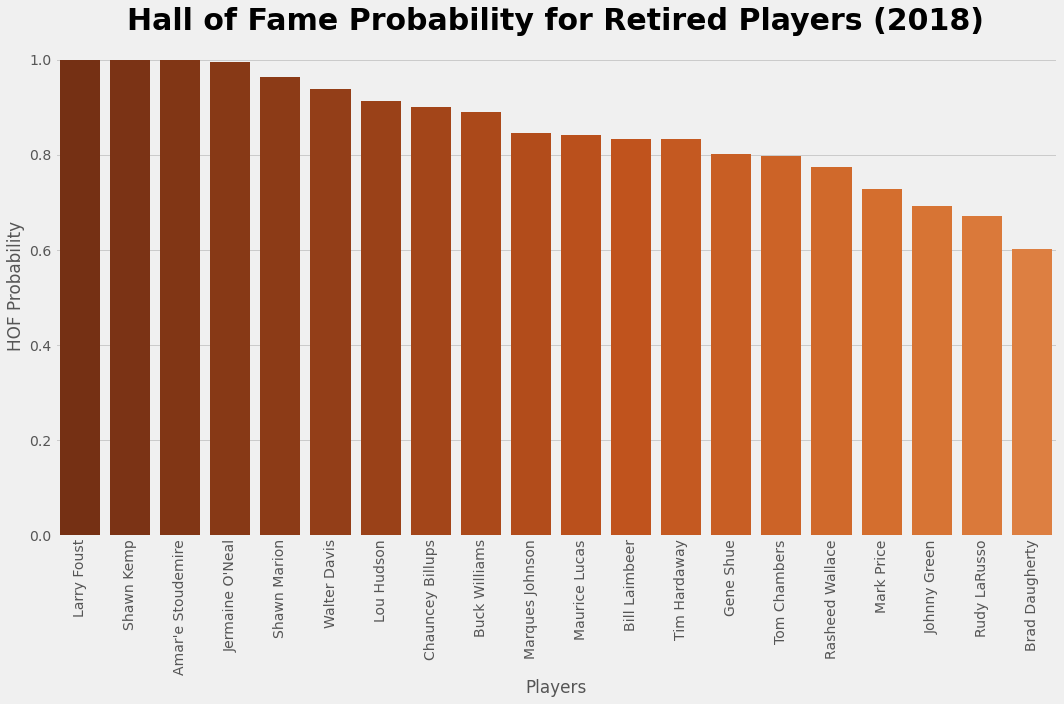

In [43]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,10))

ax = sns.barplot(x='Player', y='HOF Probability', data=retired_non_hof[:20], 
                                             palette=sns.color_palette("Oranges_r", len(retired_non_hof[:45])))
ax.set_xticklabels(retired_non_hof['Player'][:20], rotation=90)
ax.set(xlabel='Players', ylabel='HOF Probability')
plt.title('Hall of Fame Probability for Retired Players (2018)', fontsize=30, fontweight='bold')

plt.tight_layout()
plt.savefig('images/2022_hof_prob.png')

In [44]:
# predict active inductees
active_players = nba_players_hof_prob.sort_values(by='HOF Probability', ascending=False)

# get all retired players
active_players = active_players[(active_players['Last Active'] == 2022) |
                               (active_players['Retired'] == 0)]

In [45]:
# lets grab the only columns we need
active_players = active_players[['Player','Debut','Last Active','YOE','Position',
                                   'Team','HOF Probability','HOF (Y/N)']]

display(active_players.head(50))
print(active_players.shape)

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,HOF (Y/N)
1806,LeBron James,2003,2022,19,SF,CLE,1.000000,1
1012,Kevin Durant,2007,2022,14,SF,OKC,1.000000,1
2885,Chris Paul,2005,2022,17,PG,NOP,1.000000,1
1697,Dwight Howard,2004,2022,18,C,ORL,0.999999,1
110,Carmelo Anthony,2003,2022,19,SF,DEN,0.999996,1
1496,James Harden,2009,2022,13,SG,HOU,0.999993,1
3937,Russell Westbrook,2008,2022,14,PG,OKC,0.999915,1
41,LaMarcus Aldridge,2006,2022,16,PF,POR,0.999785,1
818,Stephen Curry,2009,2022,13,PG,GSW,0.999684,1
1285,Paul George,2010,2022,12,SF,IND,0.998586,1


(845, 8)


In [46]:
nba_players_hof_prob_to_csv = nba_players_hof_prob_to_csv.sort_values(by='HOF Probability', ascending=False)
display(nba_players_hof_prob_to_csv.head(100))

,Player,Debut,Last Active,YOE,Position,Team,Hall of Fame,HOF Probability,HOF (Y/N)
2,Kareem Abdul-Jabbar,1969,1989,20,C,LAL,1,1.000000,1
1899,LeBron James,2003,2022,19,SF,CLE,0,1.000000,1
529,Kobe Bryant,1996,2016,20,SG,LAL,1,1.000000,1
1057,Tim Duncan,1997,2016,19,C,SAS,1,1.000000,1
2420,Karl Malone,1985,2004,19,PF,UTA,1,1.000000,1
2911,Shaquille O'Neal,1992,2011,19,C,LAL,1,1.000000,1
2889,Dirk Nowitzki,1998,2019,21,PF,DAL,0,1.000000,0
1320,Kevin Garnett,1995,2016,21,PF,MIN,1,1.000000,1
1147,Julius Erving,1971,1987,16,SF,PHI,1,1.000000,1
2067,Michael Jordan,1984,2003,15,SG,CHI,1,1.000000,1
